# HHS false negative controversy

## Terminology

The words "state" and "outcome" are taken to apply to some studied condition of nature and an experiment, respectively. 
For example, disease and diagnosis, and, guilty and trial, respectively. An event pertains to either the state or the experiment. A partition are disjoint events that span the event space. The letter "P" means probability.

sensitivity: P( outcome is true | state is true)  
specificity: P( outcome is false | state is true)  
ppv: P(state is true | outcome is true).

## Methodology

Since its the PPV we're trying to determine, all computations are in terms of either of the prior about the state or the conditonal probabilities of the outcome given the state (a.k.a likelihood functions).

## Rules

In [1]:
(* Probability axioms *)
nonneg[proba_,event_]:=proba[event]>=0;
additive[proba_,partition_]:=Sum[proba[event],{event,partition}]
normalize[proba_,partition_]:=additive[proba,partition]==1

In [106]:
(* Corollary: bounds *)
bounds[proba_,event__]={nonneg[proba,event],proba[event]<=1};

In [7]:
(*partition*)
partition={False,True};

In [9]:
(* Overload key *)
OverloadQ[key_]:= MemberQ[{"state", "outcome"}, key]

In [11]:
(* Bayes formula *)
posterior[state_?BooleanQ,outcome_?BooleanQ]=prior[state]*condproba[outcome,state]/margproba[outcome];

In [40]:
(* Joint probabilities as conditionals of event given state *)
jointproba[state_?BooleanQ,outcome_?BooleanQ]=condproba[outcome,state]*prior[state];
jointproba["state",state_?BooleanQ,outcome_?BooleanQ]:=jointproba[state,outcome];
jointproba["outcome",outcome_?BooleanQ,state_?BooleanQ]:=jointproba[state,outcome];

In [25]:
(* Marginal probabilities *)
margproba[key_?OverloadQ,this_?BooleanQ]:=additive[proba,partition]/. proba[that_]:>jointproba[key,this,that];

In [118]:
(* Bounds *)
assumptions={bounds[prior,True],bounds[condproba,True,False]};

## Solve

In [50]:
(* Apply normalization to expanded marginal expressions *)
equations={normalize[prior,partition],margproba["state",True]==prior[True]};
solutions=Solve[equations,{prior[False],condproba[True,True]}];

In [70]:
(* Assign *)
sensitivity=condproba[True, True] /. solutions[[1]];
margproba[True]=margproba["outcome",True]/.solutions[[1]];
ppv=posterior[True,True]/.solutions[[1]];

In [125]:
(* Analysis *)
ppvD[p_]=D[ppv/. condproba[False,True]->p,p]//FullSimplify;
ppvDsign=Assuming[assumptions,Sign[ppvD[p]]]; (*TODO*)

## Show

1 - condproba[False, True]
condproba[True, False] (1 - prior[True]) + (1 - condproba[False, True]) prior[True]
                     (1 - condproba[False, True]) prior[True]
-----------------------------------------------------------------------------------
condproba[True, False] (1 - prior[True]) + (1 - condproba[False, True]) prior[True]
       condproba[True, False] (-1 + prior[True]) prior[True]
-------------------------------------------------------------------
                                                                  2
(condproba[True, False] (-1 + prior[True]) + (-1 + p) prior[True])
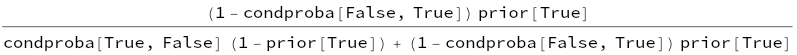
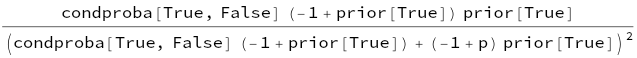

In [128]:
(* Show formulae *)
sensitivity
margproba[True]
ppv
ppvD[p]

↳Notice how the marginal probability depends on both the false positive and false negative rates.

In [133]:
(*In words*)
inwords={condproba[False,True]->falsenegrate, condproba[True,False]->falseposrate,prior[True]->prevalence};
ppv/. inwords//InputForm

((1 - falsenegrate)*prevalence)/(falseposrate*(1 - prevalence) + 

 
>     (1 - falsenegrate)*prevalence)

{condproba[True, False] -> 0.05, prior[True] -> 0.001, condproba[False, True] -> p}
-Graphics-
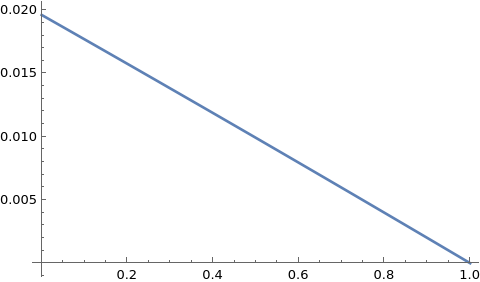

In [95]:
(*Numerical application*)
numapp={condproba[True,False]->N[5/100],prior[True]->N[1/1000],condproba[False,True]->p}
Plot[ppv/.numapp,{p,0,1}]

{condproba[True, False] -> 0.01, prior[True] -> 0.01, condproba[False, True] -> p}
-Graphics-
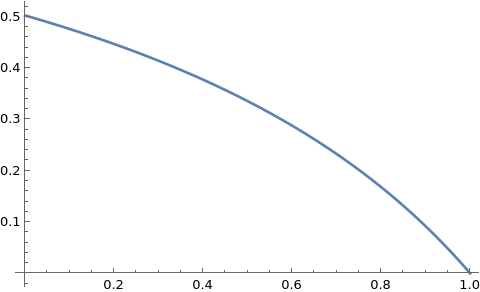

In [101]:
(*Numerical application*)
numapp={condproba[True,False]->N[1/100],prior[True]->N[10/1000],condproba[False,True]->p}
Plot[ppv/.numapp,{p,0,1}]